# Tutorial week 3

## Leaning outcomes
1.Read and save images
2.Read and save videos.
3.Resize images.

## Intro of OpenCV in Python
Setup procedure:

1.Install Python and its IDE, preferably Jupyter notebook.
2.Install OpenCV module by the following steps:
- Open cmd terminal
- Type in pip install opencv-contrib-python.

Before we starts playing around with some of the OpenCV built-in functions, lets briefly walk through what is OpenCV. Created in 1999, OpenCV currently supports a lot of algorithms related to Computer Vision and Machine Learning. OpenCV supports a wide variety of programming languages like C++, Python and Java and is available on different platforms like Window, Linux and so on.

OpenCV-Python is the Python API of OpenCV. OpenCV-Python is a Python wrapper around original C++ implementation. Another upside of using OpenCV-Python is that OpenCV array structures converted to and from Numpy arrays. So, whatever operations you can do in Numpy, you can combine it with OpenCV. All in all, OpenCV-Python is an appropriate tool for fast prototyping of computer vision problems.

## Setup


In [3]:
pip install opencv-contrib-python


     ---------------------------------------- 44.8/44.8 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 15.0/15.0 MB 4.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\sutia\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp310-cp310-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

import matplotlib.pyplot as plt

## Different formats of images
There are wide variety of image file types out there. We will discuss a few common image formats, including:

1. TIFF(.tif)

2. BMP(.bmp)

3. GIF(.gif) # cv.imread cant handle, need extrenal module

4. JPEG(.jpeg, .jpg, .jfif)

5. PNG(.png)

6. WebP(.webp)

## Read an image
Let's try to read all the images into the workspace. Before that, let's set our eye to imread() function:

{python}
cv.imread(filename, flag)
It takes 2 arguments:

- filename - image file name (Note: specify the whole path if the image is not in the working directory).
flag - specify how image should be represented.
   - cv.IMREAD_UNCHANGED or -1
   - cv.IMREAD_GRAYSCALE or 0
- cv.IMREAD_COLOR or 1 (default)
More flag arguments for cv.imread(), please refer to the online documentation.

## Display image
You can display image using imshow() function:

{python}
cv.imshow(window_name, image)
This function takes 2 arguments:

- window_name - window name that will be displayed.
- image - image (Numpy array)
To display multiple images at once, you can call this function multiple times.

The cv.imshow() function is designed to use alongside cv.waitKey() and cv.destroyAllWindows() or cv.destroyWindow() functions.

cv.waitKey() function is a keyboard-binding function. It takes single argument, which is time (miliseconds). If the user press any key within this period, the program continues. If 0 is passed, the program waits indefinitely for a keystroke. You can set the function to detect a specific keystroke like Esc key and any alphabet. For ASCII code of keyboard, please refer to this link.

cv.destroyAllWindows() destroys all windows we created.

In [4]:
img = cv.imread('images/lena.jfif')
img_grayscale = cv.imread('images/lena.jfif', 0)

cv.imshow("original", img)
cv.imshow('grayscale', img_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# TIFF
img = cv.imread('images/lena.tif')
cv.imshow('TIFF image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img = cv.imread('images/lena.png')
cv.imshow('PNG image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## special for gif
You will run into execution error if you use cv.imread on GIF file. The workaround is we need to load the gif to numpy.ndarray and change the channel orders. You can refer to this stackoverflow post for more info.

In [2]:
pip install imageio

     -------------------------------------- 313.2/313.2 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import imageio

In [6]:
gif = imageio.mimread('images/rotating_earth_large.gif')
# Convert from RGB to BGR format
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in gif]
cv.imshow('GIF image', imgs[0])
cv.waitKey(0)
cv.destroyAllWindows()

## Save image
The function is cv.imwrite():

{python}
cv.imwrite(filename, image)
It takes 2 arguments:

- filename - must include the image file extension, like .jpg, .png, and etc)
- image - image (Numpy array)

In [9]:
cv.imwrite('lena_save.jpg', img)

True

## Basic Video operations using OpenCV
A video is nothing but a series of images knit together. These image are often called frames. So, what you need to do is loop over all the frames in sequences, and then process one frame at a time.

### Read and display video from file
Use cv.VideoCapture() class to invoke a VideoCapture object which is useful to read video file.

{python}
cv.VideoCapture(path, apiPreference)
The function has 2 arguments:

1. path - directory path to the video file. 0 for webcam capture.
2. apiPreference - optional
Furthermore, there are some methods related to VideoCapture object that are worth mentioning:

- isOpened() method returns a boolean indicating whether a video file is opened successfully.
- read() returns the video frame.
- get() method retrive metadata associated with the video. It takes one argument (enumerator). get(3) --> width of frame, get(4) --> height of frame, get(5) --> frame rate. More info, please refer to this online documentation
How to read image frames from the file? Create a loop and read one frame at a time from the video stream using read() method. It returns a tuple, where the first element is a boolean and the second argument is the video frame.

### Save videos
In order to save a video file, you first need to create a video writer object from cv.VideoWriter() class. Syntax for cv.VideoWriter():

cv.VideoWriter(filename, fourcc, fps, framesize, isColor)
It takes 5 arguments:

- filename - file path name
- fourcc - 4-character code of codec. Fourcc is a 32 bit (4 byte) ASCII Character code used to uniquely identifies video formats. Below are the video codecs which corresponds to .avi video.
    -cv.VideoWriter_fourcc('M', 'J', 'P', 'G') for .avi video file
    -cv.VideoWriter_fourcc(*'MP4V') for .mp4 file
- fps: frame rate per second
- framesize: (width, height) of frame
- isColor: if not zero (default: True), the encoder will encode color frames.
The associated method to save the video file is write(frame).

In [10]:
# Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
cv.destroyAllWindows()


In [11]:
# Webcam
cap = cv.VideoCapture(0)

width = int(cap.get(3))
height = int(cap.get(4))
# define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 20
out = cv.VideoWriter('videos/out.avi', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
    # horizontal flip    
    frame = cv.flip(frame, 1)
    # write the flipped frame
    out.write(frame)
    
    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

## Image resizing
To resize an image, scale it along each axis (height and width), considering the specified scale factors or set the desired height and width.

When resizing an image:

- It is important to be mindful of the original aspect ratio of the image.
- Reducing the size of image requires resampling of pixels.
- Enlarging requires reconstruction through interpolation. Common interpolation are available in OpenCV:
    -INTER_NEAREST: nearest neighbor interpolation.
    -INTER_LINEAR: bilinear interpolation.
    -INTER_CUBIC: bicubic interpolation (generally slower). More info can be found in OpenCV online documentation
The function for image resizing is cv.resize():

cv.resize(src, dsize, fx, fy, interpolation)
1. First argument is the input image.
2. dsize: the desired output image dimension.
3. fx: scale factor along horizontal axis (width).
4. fy: scale factor along vertical axis (height).
5. interpolation: option flags stated above.
### Example 1: Specify specific output dimension

In [12]:
img = cv.imread('images/soccer.jpg')

cv.imshow('original', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
new_width = 300
new_height = 450

img_resize = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR)

cv.imshow('downscale', img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

### Example 2: Resizing with a scaling factor
The advantage of using scaling factor for resizing is that it keeps the aspect ratio intact and preserve the display quality.

In [14]:
img = cv.imread('images/lena.jfif')

img_resize = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

cv.imshow('upscale', img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise

In [4]:
#1. 
img = cv.imread('images/dog.jfif')
cv.imwrite('dog.png',img)


True

In [2]:
#2.
#1method
img = cv.imread('images/lena.jfif')
grayscale = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv.imshow('ori',img)
cv.imshow('grayscale',grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

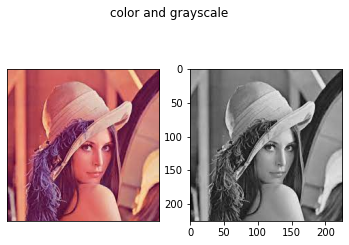

In [7]:
#2method
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale,cmap = plt.cm.gray)
plt.suptitle('color and grayscale')
plt.show()

In [15]:
#3 method

grayscale = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
grayscale = cv.cvtColor(grayscale,cv.COLOR_GRAY2BGR)


img_combined = np.hstack((img,grayscale))

cv.imshow('combined',img_combined)

cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
#3.

# Open the video file
video_path = "videos/img_pexels.mp4"
video = cv.VideoCapture(video_path)

# Get the original video's frame rate, width, and height
fps = video.get(cv.CAP_PROP_FPS)
width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

print(width,height)

# Create a VideoWriter object to save the resized video
output_path = "smaller_img_pexels.avi"
fourcc = cv.VideoWriter_fourcc(*"XVID")
output_video = cv.VideoWriter(output_path, fourcc, fps, (small_width, small_height)) 

# Read and resize each frame of the video
while True:
    ret, frame = video.read()
    if not ret:
        break
    
    # Resize the frame to the smaller size
    resized_frame = cv.resize(frame,None, fx = 0.5,fy = 0.5,interpolation = cv.INTER_LINEAR)
#     print(resized_frame.shape)#(960,540)
    # Display the resized frame
    cv.namedWindow("Resized Video", cv.WINDOW_NORMAL)
#     cv.namedWindow("ori Video", cv.WINDOW_NORMAL)
    cv.imshow("Resized Video", resized_frame)
#     cv.imshow('ori Video',frame)
    
    # Write the resized frame to the output video file
    output_video.write(resized_frame)
    
    if cv.waitKey(1) & 0xFF == 27:
        break

# Release the video capture and writer objects
video.release()
output_video.release()

# Close the OpenCV windows
cv.destroyAllWindows()

1080 1920


In [17]:

# Load the image
img = cv.imread("images/dog.jfif")

print(img.shape)
# Enlarge the image using linear interpolation,less jagged but blur
linear_interpolation  = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

# Enlarge the image using cubic interpolation, less jagged n clear
cubic_interpolation = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)

# Enlarge the image using nearest neighbor interpolation ,jagged
nearest_interpolation = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_NEAREST)

cv.imshow('ori',img)
cv.imshow('linear',linear_interpolation)
cv.imshow('cubic',cubic_interpolation)
cv.imshow('nearest',nearest_interpolation)

cv.waitKey(0)
cv.destroyAllWindows()

(168, 300, 3)
